In [115]:
#This dataset has one input (feature) and one output (label), hence, poly1d is better suited
# Regression algorithms such as Linear Reg requires 2 or more input features, though they may work here
#Source - https://www.w3schools.com/python/python_ml_train_test.asp

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import time 

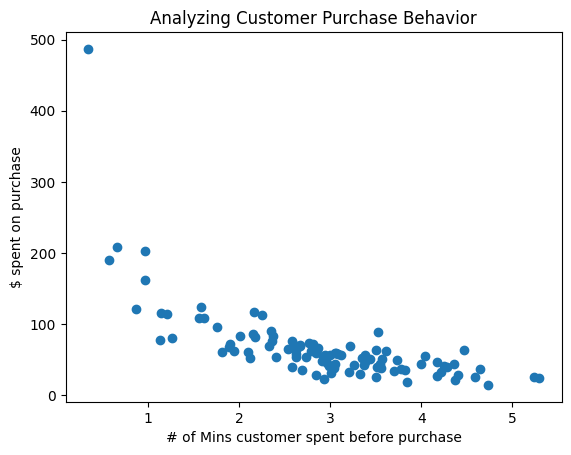

In [105]:
# Create a data set that illustrates 100 customers in a shop, and their shopping habits.
# x axis represents the number of minutes before making a purchase.
# y axis represents the amount of money spent on the purchase.

np.random.seed(2)
x = np.random.normal(3,1,100)
y = np.random.normal(150,40,100)/x
plt.scatter(x, y)
plt.xlabel("# of Mins customer spent before purchase")
plt.ylabel("$ spent on purchase")
plt.title("Analyzing Customer Purchase Behavior")
plt.show()

In [106]:
#Split the data set in training set and test set with 80:20 mix    
X_train = x[:80]
Y_train = y[:80]

X_test = x[80:]
Y_test = y[80:]

In [107]:
#train the model using a linear regression (4th degree polynomial)
#training = finding coefficients of a polynomial that best fits the relationship between train_x and train_y.

mymodel_poly1d = np.poly1d(np.polyfit(X_train, Y_train, 4))

In [108]:
#train the model using a linear regression, reshape the input data since it has just 1 feature vs >=2
X_train_reshaped = train_x.reshape(-1,1)
X_test_reshaped = test_x.reshape(-1,1)
mymodel_linear = LinearRegression()
mymodel_linear.fit(X_train_reshaped, Y_train)

LinearRegression()

In [109]:
#Using training data, find the degree of relationship between money spent and time spent in the shop
#r2 (squared error) measures the relationship between x and y (1=totally related and 0=unrelated).

r2 = r2_score(Y_train, mymodel_poly1d(X_train))
if r2 < 0.80:
    print("With Poly1D, x and y are related ok", r2)
else: 
    print("With Poly1D, x and y are related good", r2)

Y_predicted = mymodel_linear.predict(X_train_reshaped)
r2 = r2_score(Y_train, Y_predicted)
if r2 < 0.80:
    print(f"With LinearRegression, x and y are related ok (since R2={r2:.2f})")
else: 
    print("With LinearRegression, x and y are related good (since R2={r2:.2f})")

With Poly1D, x and y are related ok 0.79886455446298
With LinearRegression, x and y are related ok (since R2=0.43)


In [110]:
#Using test data, find the degree of relationship between money spent and time spent in the shop.
#r2 (squared error) measures the relationship between x and y (1=totally related and 0=unrelated).

r2 = r2_score(Y_test, mymodel_poly1d(X_test))
if r2 < 0.80:
    print("With Poly1D, x and y are related ok", r2)
else: 
    print("With Poly1D, x and y are related good", r2)

Y_predicted = mymodel_linear.predict(X_test_reshaped)
r2 = r2_score(Y_test, Y_predicted)
if r2 < 0.80:
    print(f"With LinearRegression, x and y are related ok (since R2={r2:.2f})")
else: 
    print("With LinearRegression, x and y are related good (since R2={r2:.2f})")
print("Linear Regression Coefficients: \n", mymodel_linear.coef_)

With Poly1D, x and y are related good 0.8086921460343566
With LinearRegression, x and y are related ok (since R2=0.68)
Linear Regression Coefficients: 
 [-37.60740112]


In [128]:
#Use the trained model for predicting $ purchase value for a certain # of mins spent
mins_spent = 32
mins_spent_reshaped = ([[32]])
print("$"+ str(mymodel_poly1d(mins_spent)) +" purchase likely if a customer spent " +str(mins_spent)+" mins")
print("$"+ str(mymodel_linear.predict(mins_spent_reshaped)) +" purchase likely if a customer spent " +str(mins_spent)+" mins")

$3813786.717643842 purchase likely if a customer spent 32 mins
$[-1168.69768926] purchase likely if a customer spent 32 mins


In [112]:
#polynomial 1d isn't a good model since any input outside the training data range would yield weird output
#linear regression is a bit worse, since it gives a negative $ value... we can try to normalize the input data

In [117]:
#Normalize the features values in training and test dataset for equal feature weightage  
X_train_reshaped = X_train.reshape(-1,1)
X_test_reshaped = X_test.reshape(-1,1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.fit_transform(X_test_reshaped)

In [119]:
mymodel_linear = LinearRegression()
mymodel_linear.fit(X_train_scaled, Y_train)

LinearRegression()

In [123]:
Y_predicted = mymodel_linear.predict(X_train_reshaped)
r2 = r2_score(Y_train, Y_predicted)
print(r2)

-3.044193491740667


In [121]:
Y_predicted = mymodel_linear.predict(X_test_reshaped)
r2 = r2_score(Y_test, Y_predicted)
print(r2)

-7.85301424258714


In [124]:
mins_spent_reshaped = ([[3]])
print("$"+ str(mymodel_linear.predict(mins_spent_reshaped)) +" purchase likely if a customer spent " +str(mins_spent)+" mins")

$[-47.39398276] purchase likely if a customer spent 3 mins
